In [1]:
import pandas as pd
import seaborn as sns
import datetime

In [2]:
#load up the data from this github users
df = pd.read_csv('https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv')

In [3]:
#take a look
df.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed


In [4]:
#see what Countries are in the dataset
df['Country.Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'H

In [9]:
#define interesting nations
interest_nations = ['US', 'Sweden', 'United Kingdom', 'Spain', 'Finland','Belgium', 'Italy','France', 'Netherlands', 'Canada']
#check to see that all values in our list are in the Country field
[x for x in interest_nations if x in df['Country.Region'].unique()]

['US',
 'Sweden',
 'United Kingdom',
 'Spain',
 'Finland',
 'Belgium',
 'Italy',
 'France',
 'Netherlands',
 'Canada']

In [15]:
#add a week field so we can chart it by week. we will then use this to chart our information
def get_week(in_date):
    return pd.to_datetime(in_date, format="%Y-%m-%d").week
df['week'] = df['date'].apply(get_week)

In [16]:
# group by country. this yeilds a group by feature we can use to quickly grab a nation. this could also be done with a filter
g = df.groupby('Country.Region')
g.get_group('US')

,Province.State,Country.Region,Lat,Long,date,cases,type,week
16608,NaN,US,37.0902,-95.7129,2020-01-22,1,confirmed,4
16609,NaN,US,37.0902,-95.7129,2020-01-23,0,confirmed,4
16610,NaN,US,37.0902,-95.7129,2020-01-24,1,confirmed,4
16611,NaN,US,37.0902,-95.7129,2020-01-25,0,confirmed,4
16612,NaN,US,37.0902,-95.7129,2020-01-26,3,confirmed,4
16613,NaN,US,37.0902,-95.7129,2020-01-27,0,confirmed,5
16614,NaN,US,37.0902,-95.7129,2020-01-28,0,confirmed,5
16615,NaN,US,37.0902,-95.7129,2020-01-29,0,confirmed,5
16616,NaN,US,37.0902,-95.7129,2020-01-30,0,confirmed,5
16617,NaN,US,37.0902,-95.7129,2020-01-31,2,confirmed,5


In [18]:
#get the group for usa
us = g.get_group('US')

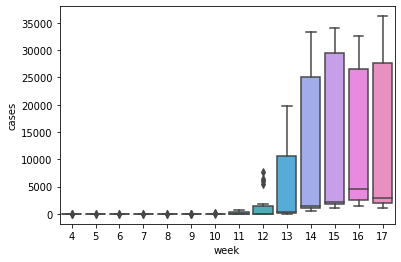

In [19]:
#this will show all types of cases so [recovered, confirmed and death]
sns.boxplot(x='week', y='cases', data=us)

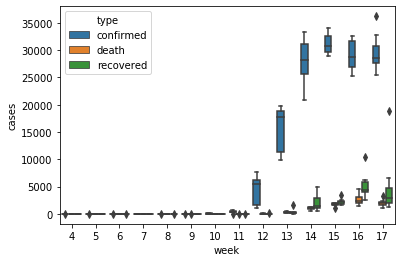

In [20]:
#we can hue the chart by type
sns.boxplot(x='week', y='cases', data=us, hue='type')


In [24]:
#the first few weeks are not interesting. by applying this filter we can select the 4 most recent weeks, and only select deaths
filt= ((us['week'].isin([17,16,15,14])) & (us['type'] == 'death'))

In [25]:
deaths= us[filt]

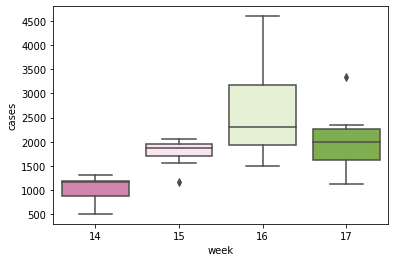

In [28]:
#plot the deaths for the last month as a box plot
sns.boxplot(x='week', y='cases', data=deaths, palette='PiYG')


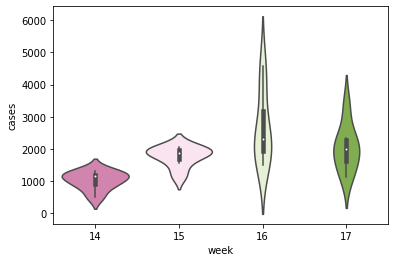

In [31]:
sns.violinplot(x='week', y='cases', data=deaths, palette='PiYG')


In [42]:
#take a look at the day with the most deaths 
deaths.loc[deaths['cases'].idxmax()]

Province.State           NaN
Country.Region            US
Lat                  37.0902
Long                -95.7129
date              2020-04-16
cases                   4592
type                   death
week                      16
Name: 42037, dtype: object